In [1]:
from matplotlib import pyplot as plt


COLOR = plt.colormaps["viridis"]

PROTEIN = "AF-A0A2U9QQQ4-F1"
PROTEIN_NAME = PROTEIN.split("-")[1]

EMBEDDINGS = ["grasr-euclidean", "grasr-cosine", "pca-euclidean", "pca-cosine", "zirke-euclidean", "zirke-cosine", "lmi-euclidean", "lmi-cosine", "lmi-30-euclidean", "lmi-30-cosine"]
EMBEDDINGS_LEGEND = ["GraSR (E)", "GraSR (C)", "PCA-reduced GraSR (E)", "PCA-reduced GraSR (C)", "3D-af-Surfer (E)", "3D-af-Surfer (C)", "LMI-10 (E)", "LMI-10 (C)", "LMI-30 (E)", "LMI-30 (C)"]


Histogram of distances for A0A2U9QQQ4


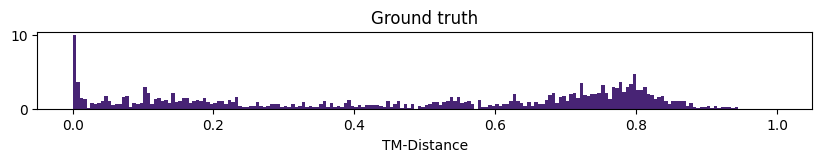

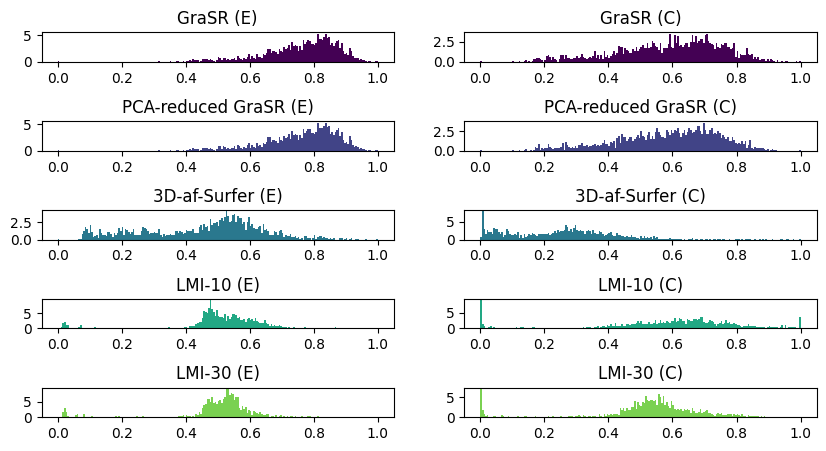

In [2]:
from matplotlib import pyplot as plt
import json

jsons = []
with open(f"results/{PROTEIN}-distances.json", "r") as f:
    jsons.append(json.load(f))

for embedding in EMBEDDINGS:
    with open(f"results/{PROTEIN}-distances-{embedding}.json", "r") as f:
        jsons.append(json.load(f))


print("Histogram of distances for", PROTEIN_NAME)
plt.hist(jsons[0].values(), density=True, histtype='bar', bins=200, range=(0,1), alpha=1, color=COLOR(0.1))
plt.title("Ground truth")
plt.gcf().set_size_inches(10, 1)
plt.xlabel("TM-Distance")
plt.savefig(f"images/protein-histogram1.png", dpi=300, bbox_inches='tight')
plt.show()

for index, file in enumerate(jsons[1:]):
    plt.subplot(5, 2, index+1)
    plt.subplots_adjust(hspace=2)
    plt.hist(file.values(), density=True, histtype='bar', bins=200, range=(0,1), alpha=1, color=COLOR((index // 2) / 5))
    plt.title(EMBEDDINGS_LEGEND[index])

plt.gcf().set_size_inches(10, 5)
plt.savefig(f"images/protein-histogram2.png", dpi=300, bbox_inches='tight')
plt.show()

Range 0.9-1: 20
Range 0.8-0.9: 248
Range 0.7-0.8: 493
Range 0.6-0.7: 205
Range 0.5-0.6: 159
Range 0.4-0.5: 89
Range 0.3-0.4: 99
Range 0.2-0.3: 128
Range 0.1-0.2: 258
Range 0-0.1: 302
Distribution of distances for A0A2U9QQQ4


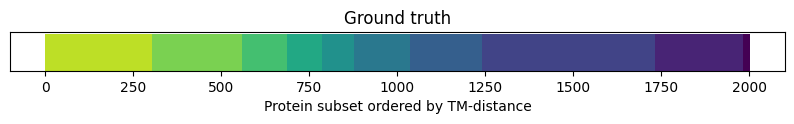

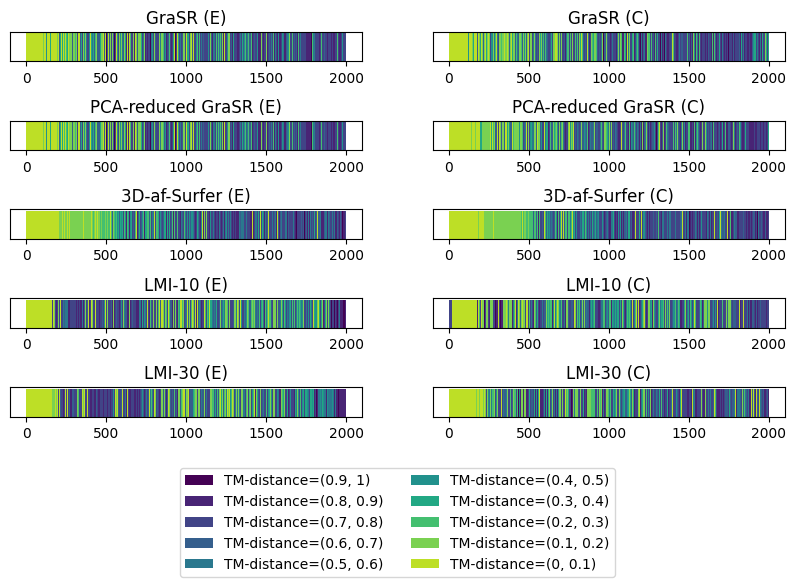

In [6]:
jsons = []
with open(f"results/{PROTEIN}-distances.json", "r") as f:
    jsons.append(json.load(f))

ranges = [(0.9, 1), (0.8, 0.9), (0.7, 0.8), (0.6, 0.7), (0.5, 0.6), (0.4, 0.5), (0.3, 0.4), (0.2, 0.3), (0.1, 0.2), (0, 0.1)]
protein_filters = [[]] * len(ranges)
for i, (start, end) in enumerate(ranges):
    protein_filters[i] = [k for k, v in jsons[0].items() if start <= v < end]
    print(f"Range {start}-{end}:", len(protein_filters[i]))

for embedding in EMBEDDINGS:
    with open(f"results/{PROTEIN}-distances-{embedding}.json", "r") as f:
        jsons.append(json.load(f))

# plot ground truth first
print("Distribution of distances for", PROTEIN_NAME)

rankings = list(range(0, len(jsons[0])))

filtered_proteins = []
zipped = list(zip(jsons[0].keys(), rankings))

for color_index, filt in enumerate(protein_filters):
    filtered_proteins = [r for (k, r) in zipped if k in filt]
    plt.bar(filtered_proteins, [1] * len(filtered_proteins), width=1, align="edge", color=COLOR(color_index / len(ranges)))
plt.title("Ground truth")
plt.gcf().set_size_inches(10, 0.5)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel("Protein subset ordered by TM-distance")
plt.savefig(f"images/protein-hits1.png", dpi=300, bbox_inches='tight')
plt.show()

for index, file in enumerate(jsons[1:]):
    plt.subplot(5, 2, index+1)
    plt.subplots_adjust(hspace=2)

    zipped = list(zip(file.keys(), rankings))
    for color_index, filt in enumerate(protein_filters):
        filtered_proteins = [r for (k, r) in zipped if k in filt]
        plt.bar(filtered_proteins, [1] * len(filtered_proteins), width=1, align="edge", color=COLOR(color_index / len(ranges)))
        plt.gca().axes.get_yaxis().set_visible(False)
    else:
        plt.title(EMBEDDINGS_LEGEND[index])

plt.gcf().set_size_inches(10, 5)
plt.legend([f"TM-distance={r}" for r in ranges], bbox_to_anchor=(-0.1, -1.5), loc="upper center", ncol=2)

plt.savefig(f"images/protein-hits2.png", dpi=300, bbox_inches='tight')
plt.show()

In [4]:
import requests

ground_truth = jsons[0].keys()
surfer_euc = jsons[5].keys()
grasr_cos = jsons[1].keys()

distances_surfer = []
distances_grasr = []
for index, protein in enumerate(ground_truth):
    # find distance in rank for surfer
    distances_surfer.append(abs(index - list(surfer_euc).index(protein)))
    distances_grasr.append(abs(index - list(grasr_cos).index(protein)))

zipped = list(zip(ground_truth, distances_surfer))

outlier = max(zipped, key=lambda x: x[1])
print("Biggest outlier for", PROTEIN_NAME)
print(
    outlier,
    "Rank in ground truth:",
    list(ground_truth).index(outlier[0]),
    "Rank in 3D-af-Surfer Euclidean:",
    list(surfer_euc).index(outlier[0]),
     "Rank in GraSR Cosine:",
    list(grasr_cos).index(outlier[0])
)

# compute average error between ground_truth and surfer rankings
print("Average error between ground truth and 3D-af-Surfer Euclidean:", sum(distances_surfer) / len(distances_surfer))
print("Median", sorted(distances_surfer)[len(distances_surfer) // 2])

print("Average error between ground truth and GraSR C:", sum(distances_grasr) / len(distances_grasr))
print("Median", sorted(distances_grasr)[len(distances_grasr) // 2])

Biggest outlier for A0A2U9QQQ4
('W0FYW2', 1774) Rank in ground truth: 64 Rank in 3D-af-Surfer Euclidean: 1838 Rank in GraSR Cosine: 967
Average error between ground truth and 3D-af-Surfer Euclidean: 314.335832083958
Median 204
Average error between ground truth and GraSR C: 374.99550224887554
Median 298


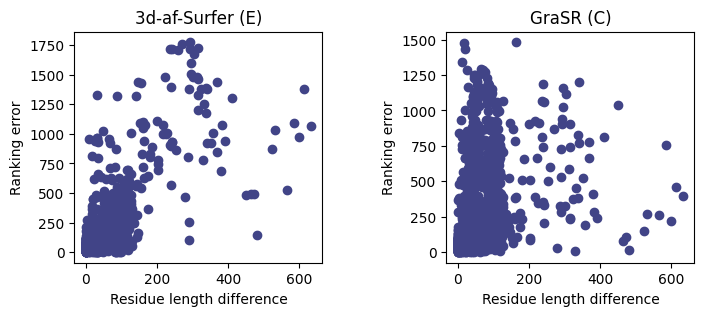

In [12]:
lengths = []
for protein in list(ground_truth):
    response = requests.get(f"https://alphafold.ebi.ac.uk/api/uniprot/summary/{protein}.json")
    lengths.append(response.json()["uniprot_entry"]["sequence_length"])
residue_difference = [abs(l-219) for l in lengths]

# subplot
plt.subplot(1, 2, 1)
plt.scatter(residue_difference[:1000], distances_surfer[:1000], color=COLOR(0.2))
plt.xlabel("Residue length difference")
plt.ylabel("Ranking error")
plt.title("3d-af-Surfer (E)")

plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 2)
plt.scatter(residue_difference[:1000], distances_grasr[:1000], color=COLOR(0.2))
plt.xlabel("Residue length difference")
plt.ylabel("Ranking error")
plt.title("GraSR (C)")

plt.gcf().set_size_inches(8, 3)
plt.savefig(f"images/protein-outlier-graph.png", dpi=300, bbox_inches='tight')
plt.show()